In [3]:
from sympy import *
import sympy
import pyperclip

def easycopy(sympyObj):
    pyperclip.copy((latex(sympyObj)).replace("{\\left(x,y,z,t \\right)}",""))


def gradient(scalar_function, variables):
    matrix_scalar_function = Matrix([scalar_function])
    return matrix_scalar_function.jacobian(variables)
def tensorDiv(mat, axes):
    res = [0,0,0]
    for i in range(3):
        for j in range(3):
            res[i] += diff(mat[i,j],axes[j])
    return Matrix(res)

mu, lam = symbols("\mu \lambda")

c = Matrix([
[2*mu+lam,lam,lam,0,0,0],
[lam,2*mu+lam,lam,0,0,0],
[lam,lam,2*mu+lam,0,0,0],
[0,0,0,mu,0,0],
[0,0,0,0,mu,0],
[0,0,0,0,0,mu],
])


x,y,z,t = symbols("x y z t")
dims = [x,y,z]
us = [Function("U_x")(x,y,z,t),Function("U_y")(x,y,z,t),Function("U_z")(x,y,z,t)]

U=Matrix(us)
easycopy(c)
U

Matrix([
[U_x(x, y, z, t)],
[U_y(x, y, z, t)],
[U_z(x, y, z, t)]])

In [4]:
gradientMat = gradient(U,symbols("x y z"))
gradientTranspose = gradient(U.transpose() ,symbols("x y z"))
uTerm = (1/2)*(gradientMat + gradientTranspose)
easycopy(uTerm)
uTerm

Matrix([
[1.0*Derivative(U_x(x, y, z, t), x), 1.0*Derivative(U_x(x, y, z, t), y), 1.0*Derivative(U_x(x, y, z, t), z)],
[1.0*Derivative(U_y(x, y, z, t), x), 1.0*Derivative(U_y(x, y, z, t), y), 1.0*Derivative(U_y(x, y, z, t), z)],
[1.0*Derivative(U_z(x, y, z, t), x), 1.0*Derivative(U_z(x, y, z, t), y), 1.0*Derivative(U_z(x, y, z, t), z)]])

In [5]:
result = tensorDiv(uTerm*c[0:3,0:3],dims)
result

Matrix([
[2.0*\lambda*Derivative(U_x(x, y, z, t), x, y) + 2.0*\lambda*Derivative(U_x(x, y, z, t), x, z) + 2.0*\lambda*Derivative(U_x(x, y, z, t), y, z) + (1.0*\lambda + 2.0*\mu)*Derivative(U_x(x, y, z, t), (x, 2)) + (1.0*\lambda + 2.0*\mu)*Derivative(U_x(x, y, z, t), (y, 2)) + (1.0*\lambda + 2.0*\mu)*Derivative(U_x(x, y, z, t), (z, 2))],
[2.0*\lambda*Derivative(U_y(x, y, z, t), x, y) + 2.0*\lambda*Derivative(U_y(x, y, z, t), x, z) + 2.0*\lambda*Derivative(U_y(x, y, z, t), y, z) + (1.0*\lambda + 2.0*\mu)*Derivative(U_y(x, y, z, t), (x, 2)) + (1.0*\lambda + 2.0*\mu)*Derivative(U_y(x, y, z, t), (y, 2)) + (1.0*\lambda + 2.0*\mu)*Derivative(U_y(x, y, z, t), (z, 2))],
[2.0*\lambda*Derivative(U_z(x, y, z, t), x, y) + 2.0*\lambda*Derivative(U_z(x, y, z, t), x, z) + 2.0*\lambda*Derivative(U_z(x, y, z, t), y, z) + (1.0*\lambda + 2.0*\mu)*Derivative(U_z(x, y, z, t), (x, 2)) + (1.0*\lambda + 2.0*\mu)*Derivative(U_z(x, y, z, t), (y, 2)) + (1.0*\lambda + 2.0*\mu)*Derivative(U_z(x, y, z, t), (z, 2))]

Text(0, 0.5, 'Displacement')

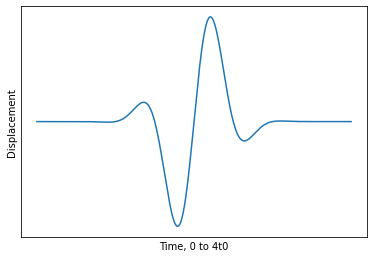

In [25]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

f0 = 10000
t0 = 1/f0

tRange = np.linspace(0,t0*4, 1000)
vRange = np.exp(-(2*(tRange-2*t0)/t0)**2)*np.sin(2*np.pi*f0*tRange)
envelope = np.exp(-(2*(tRange-2*t0)/t0)**2)

ax.plot(tRange, vRange)

ax.set_xticks([])
ax.set_yticks([])

ax.set_xlabel("Time, 0 to 4t0")
ax.set_ylabel("Displacement")
